## Notebook for publication ready plots for the thesis

In [5]:
from stareg.star_model import StarModel
from stareg.bspline import Bspline
import plotly.graph_objects as go
import numpy as np 
import pandas as pd
import os
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots

In [158]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from pylab import cm
%matplotlib inline

#mpl.rcParams["font.family"] = "sans-serif"
#mpl.rcParams["font.sans-serif"] = "Computer Modern Sans Serif"
mpl.rcParams["font.serif"] = "Computer Modern Roman"
plt.rcParams["font.size"] = 18
plt.rcParams["axes.linewidth"] = 2

colors = cm.get_cmap("tab10", 10)

In [270]:
np.random.seed(1)
x = np.linspace(0,1,100)
y_true = 3*np.sin(3*np.pi*x) + 16*x + 5
y = y_true + np.random.normal(loc=0, scale=0.6, size=len(x))
df = pd.DataFrame(data={"x":x, "y":y, "y_true":y_true})

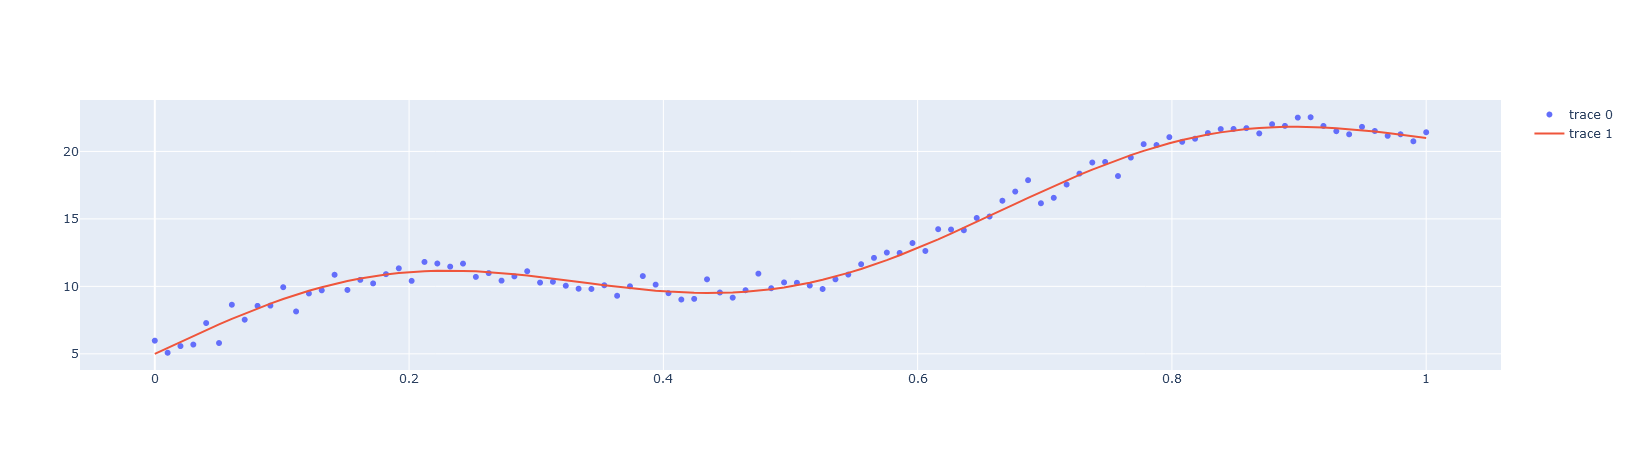

In [71]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df["x"], y=df["y"], mode="markers"))
fig.add_trace(go.Scatter(x=df["x"], y=df["y_true"], mode="lines"))

In [76]:
m_smooth = (("s(1)", "none", 10, (0, 0), "equidistant"),)
m_wiggly = (("s(1)", "none", 50, (0, 0), "equidistant"),)
m_p = (("s(1)", "none", 50, (100, 0), "equidistant"),)


In [77]:
M_smooth = StarModel(description=m_smooth)
M_wiggly = StarModel(description=m_wiggly)
M_p = StarModel(description=m_p)

In [78]:
M_smooth.fit(X=df["x"].values.reshape(-1,1), y=df["y"], plot_=0)
M_wiggly.fit(X=df["x"].values.reshape(-1,1), y=df["y"], plot_=0)
M_p.fit(X=df["x"].values.reshape(-1,1), y=df["y"], plot_=0)

ypred_s = M_smooth.basis @ M_smooth.coef_
ypred_w = M_wiggly.basis @ M_wiggly.coef_
ypred_p = M_wiggly.basis @ M_wiggly.coef_

df_fit = pd.DataFrame(data={"fit_s":M_smooth.basis @ M_smooth.coef_, "fit_w":M_wiggly.basis @ M_wiggly.coef_, "fit_p": M_p.basis @ M_p.coef_})

dfp = pd.concat([df, df_fit], axis=1)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


### **Plot B-spline fit and basis functions**

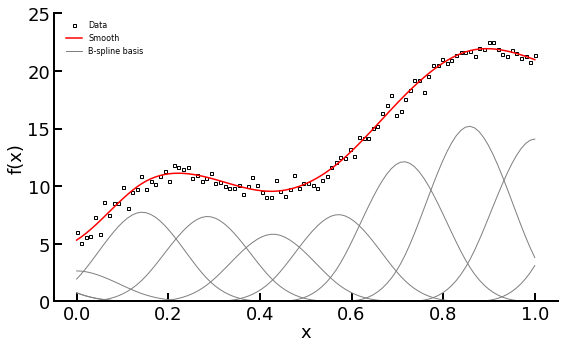

In [303]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0, 0, 1, 1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_tick_params(which="major", size=8, width=2, direction="in", top=False)
ax.yaxis.set_tick_params(which="major", size=8, width=2, direction="in", top=False)

ax.plot(x, y, color="black", label="Data", marker="s", markersize=3, markerfacecolor='none', markeredgecolor="black", linewidth=0)
                                                            
ax.plot(x, dfp["fit_s"], color="red", label="Smooth")

for i in range(M_smooth.basis.shape[1]):
    ax.plot(x, M_smooth.basis[:,i]*M_smooth.coef_[i], color="grey", linewidth=1)
    if i == 0:
        ax.plot(x, M_smooth.basis[:,i]*M_smooth.coef_[i], color="grey", linewidth=1, label="B-spline basis")
        
ax.set_xlabel("x", labelpad=0)
ax.set_ylabel("f(x)", labelpad=2)
ax.set_ylim(bottom=0, top=25)

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(5))


ax.legend(bbox_to_anchor=(0.01, 1), loc="upper left", frameon=False, fontsize=8)

#plt.savefig('..\\..\\Thesis\\thesisplots\\smooth_bf.pdf',  transparent=False, bbox_inches='tight')

### **Plot low and high number of splines**

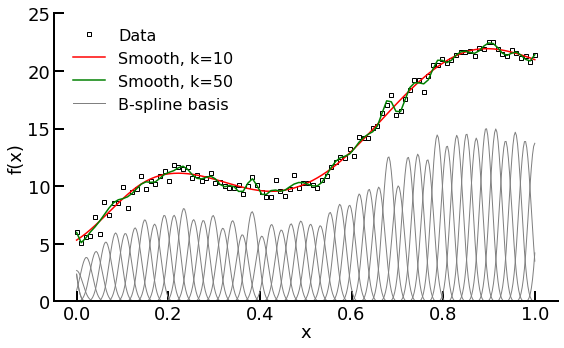

In [304]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)
ax.yaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)

ax.plot(x, y, color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
                                                            
ax.plot(x, dfp["fit_s"], color="red", label="Smooth, k=10")
ax.plot(x, dfp["fit_w"], color="green", label="Smooth, k=50")

# create finer B-spline basis for plotting
xplot = np.linspace(0,1,400)
BS = Bspline()
BS.bspline_basis(x_data=xplot, k=M_wiggly.basis.shape[1])
for i in range(M_wiggly.basis.shape[1]):
    ax.plot(xplot, BS.basis[:,i]*M_wiggly.coef_[i], color="grey", linewidth=1)
    if i == 0:
        ax.plot(xplot, BS.basis[:,i]*M_wiggly.coef_[i], color="grey", linewidth=1, label="B-spline basis")
        
#ax.set_xlabel(r"$\mathregular{\lambda}$ (nm)", labelpad=0)
ax.set_xlabel("x", labelpad=0)
ax.set_ylabel("f(x)", labelpad=2)
ax.set_ylim(bottom=0, top=25)

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(5))

ax.legend(bbox_to_anchor=(0.01, 1), loc="upper left", frameon=False, fontsize=16)

#plt.savefig('..\\..\\Thesis\\thesisplots\\smooth_wiggly_bf.pdf', transparent=False, bbox_inches='tight')

### **Plot P-splines for several $\lambda_s$ values**

In [107]:
n = 50
m_p_m2 = (("s(1)", "none", n, (10**-2, 0), "equidistant"),)
m_p_0 = (("s(1)", "none", n, (10**0, 0), "equidistant"),)
m_p_2 = (("s(1)", "none", n, (10**2, 0), "equidistant"),)
m_p_4 = (("s(1)", "none", n, (10**4, 0), "equidistant"),)
m_p_6 = (("s(1)", "none", n, (10**6, 0), "equidistant"),)
m_p_8 = (("s(1)", "none", n, (10**8, 0), "equidistant"),) 


M_p_m2 = StarModel(description=m_p_m2).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_0 = StarModel(description=m_p_0).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_2 = StarModel(description=m_p_2).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_4 = StarModel(description=m_p_4).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_6 = StarModel(description=m_p_6).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)
M_p_8 = StarModel(description=m_p_8).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0, verbose=False)

ypred_p_m2 = M_p_m2.basis @ M_p_m2.coef_
ypred_p_0 = M_p_0.basis @ M_p_0.coef_
ypred_p_2 = M_p_2.basis @ M_p_2.coef_
ypred_p_4 = M_p_4.basis @ M_p_4.coef_
ypred_p_6 = M_p_6.basis @ M_p_6.coef_
ypred_p_8 = M_p_8.basis @ M_p_8.coef_

df_ps = pd.DataFrame(data={"x":x, "y":y, "yp_m2":ypred_p_m2, "yp_0":ypred_p_0, "yp_2":ypred_p_2, "yp_4":ypred_p_4, "yp_6":ypred_p_6, "yp_8":ypred_p_8 })

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


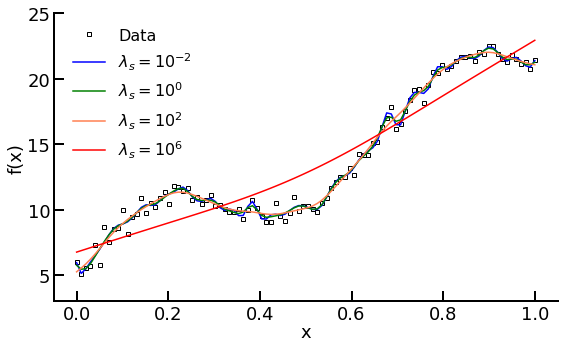

In [305]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)
ax.yaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)

ax.plot(x, y, color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)                                                            
ax.plot(x, df_ps["yp_m2"], color="blue", label=r"$\lambda_s = 10^{-2}$")
ax.plot(x, df_ps["yp_0"], color="green", label=r"$\lambda_s = 10^{0}$")
ax.plot(x, df_ps["yp_2"], color="coral", label=r"$\lambda_s = 10^{2}$")
ax.plot(x, df_ps["yp_6"], color="red", label=r"$\lambda_s = 10^{6}$")

       
#ax.set_xlabel(r"$\mathregular{\lambda}$ (nm)", labelpad=0)
ax.set_xlabel("x", labelpad=0)
ax.set_ylabel("f(x)", labelpad=2)
ax.set_ylim(bottom=3, top=25)

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(5))

ax.legend(bbox_to_anchor=(0.01, 1), loc="upper left", frameon=False, fontsize=16)

#plt.savefig('..\\..\\Thesis\\thesisplots\\p_splines.pdf', transparent=False, bbox_inches='tight')

## **Monotonicity constraint fit**

In [271]:
n = 30
m_base = (("s(1)", "none", n, (0.1, 0), "equidistant"),)
m_c = (("s(1)", "inc", n, (0.1, 6000), "equidistant"),)

Mbase = StarModel(description=m_base).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0)
Mcon = StarModel(description=m_c).fit(X=df["x"].values.reshape(-1,1), y=df["y"].values, plot_=0)

ypred_b = Mbase.basis @ Mbase.coef_
ypred_c = Mcon.basis @ Mcon.coef_

df_c = pd.concat((df, pd.DataFrame(data={"yp_b":ypred_b, "yp_c":ypred_c})), axis=1)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


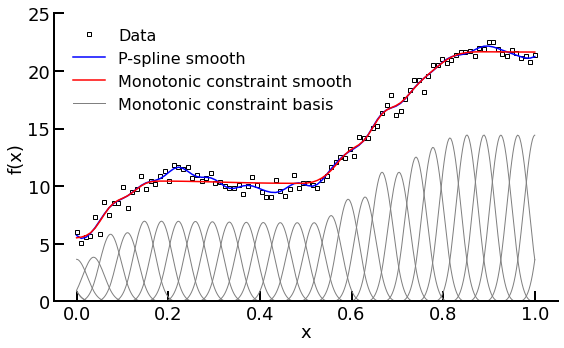

In [306]:
fig = plt.figure(figsize=(7,4))
ax = fig.add_axes([0,0,1,1])

ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)
ax.yaxis.set_tick_params(which="major", size=10, width=2, direction="in", top=False)

ax.plot(x, y, color="black", label="Data", marker="s", markersize=4, markerfacecolor='none', markeredgecolor="black", linewidth=0)
                                                            
ax.plot(x, df_c["yp_b"], color="blue", label="P-spline smooth")
ax.plot(x, df_c["yp_c"], color="red", label="Monotonic constraint smooth")

# create finer B-spline basis for plotting
xplot = np.linspace(0,1,400)
BS = Bspline()
BS.bspline_basis(x_data=xplot, k=Mcon.basis.shape[1])
for i in range(Mcon.basis.shape[1]):
    ax.plot(xplot, BS.basis[:,i]*Mcon.coef_[i], color="grey", linewidth=1)
    if i == 0:
        ax.plot(xplot, BS.basis[:,i]*Mcon.coef_[i], color="grey", linewidth=1, label="Monotonic constraint basis")
        
#ax.set_xlabel(r"$\mathregular{\lambda}$ (nm)", labelpad=0)
ax.set_xlabel("x", labelpad=0)
ax.set_ylabel("f(x)", labelpad=2)
ax.set_ylim(bottom=0, top=25)

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(5))

ax.legend(bbox_to_anchor=(0.01, 1), loc="upper left", frameon=False, fontsize=16)

#plt.savefig('..\\..\\Thesis\\thesisplots\\inc_spline.pdf', transparent=False, bbox_inches='tight')

## **2D Test Function**

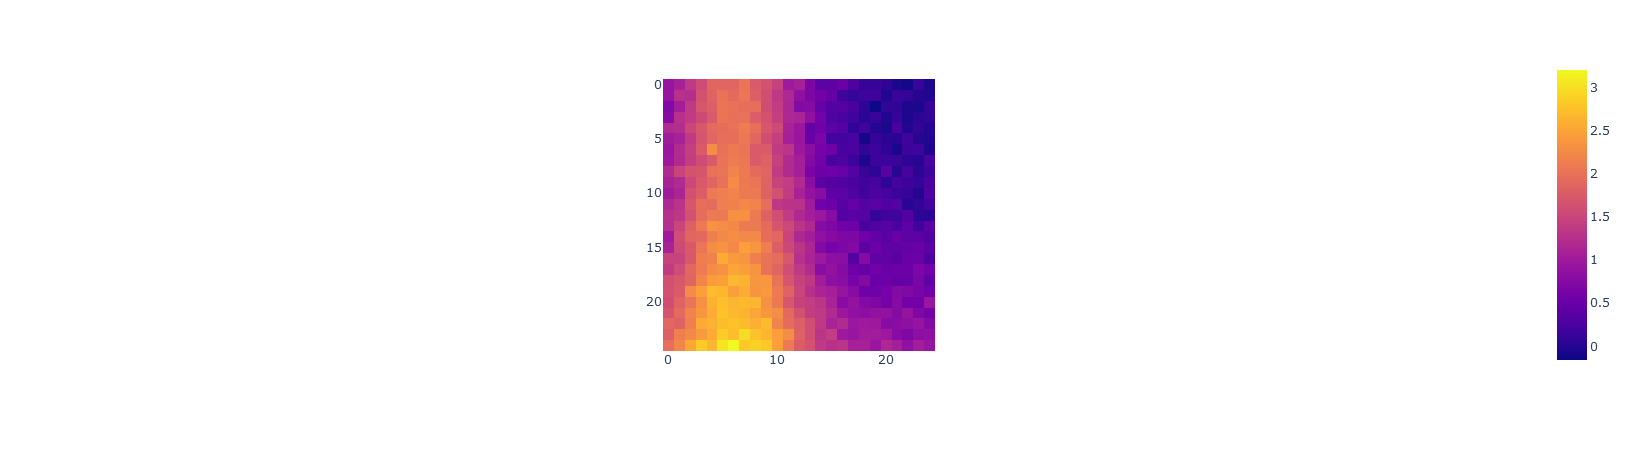

In [2]:
n = 25
x1, x2 = np.linspace(0,1,n), np.linspace(0,1,n)
x1g, x2g = np.meshgrid(x1, x2)
X = np.vstack((x1g.ravel(), x2g.ravel())).T
def f(x1, x2):
    return 2*np.exp(-((x1 - 0.25)**2/0.08)) + x2**2 + np.random.normal(loc=0.0, scale=0.1, size=x1.shape)
y2d = f(X[:,0], X[:,1])
df = {"x1":X[:,0], "x2":X[:,1], "y":y2d}
px.imshow(y2d.reshape(25,25))

In [3]:
m = ( ("s(1)", "peak", 50, (1, 6000), "equidistant"),
       ("s(2)", "inc", 50, (1, 6000), "equidistant"),
    )
M = StarModel(description=m)
M.fit(X=X, y=y2d, plot_=0, verbose=False, max_iter=5)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


StarModel(s(1)={'constraint': 'peak', 'knot_type': 'equidistant',
                'lam': {'constraint': 6000, 'smoothness': 1}, 'n_param': 50},
          s(2)={'constraint': 'inc', 'knot_type': 'equidistant',
                'lam': {'constraint': 6000, 'smoothness': 1}, 'n_param': 50})

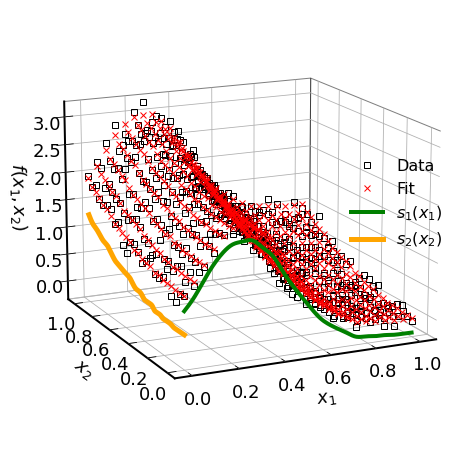

In [16]:
fig = plt.figure(figsize=(14,8))
ax = fig.gca(projection='3d')

ax.grid(True)
ax.xaxis.pane.set_edgecolor("black")
ax.yaxis.pane.set_edgecolor("black")
ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False
ax.view_init(elev=15, azim=135+110)

ax.xaxis._axinfo["tick"]["inward_factor"] = 0
ax.xaxis._axinfo["tick"]["outward_factor"] = 0.4
ax.yaxis._axinfo["tick"]["inward_factor"] = 0
ax.yaxis._axinfo["tick"]["outward_factor"] = 0.4
ax.zaxis._axinfo["tick"]["inward_factor"] = 0.4
ax.zaxis._axinfo["tick"]["outward_factor"] = 0.4
ax.zaxis._axinfo["tick"]["outward_factor"] = 0.4

ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.yaxis.set_major_locator(MultipleLocator(0.2))
ax.zaxis.set_major_locator(MultipleLocator(0.5))

ax.plot(xs=X[:,0], ys=X[:,1], zs=y2d, marker="s", label="Data", color="black", markersize=6, markerfacecolor='none', markeredgecolor="black", linewidth=0)
ax.plot(xs=X[:,0], ys=X[:,1], zs=M.basis@M.coef_, label="Fit", marker="x", color="red", markersize=6, markerfacecolor='none', markeredgecolor="red", linewidth=0)

ax.set_xlabel(r"$x_1$", labelpad=10)
ax.set_ylabel(r"$x_2$", labelpad=10)
ax.set_zlabel(r"$f(x_1,x_2)$", labelpad=10)

xplot, B = np.linspace(0,1,200), Bspline()
B.bspline_basis(x_data=xplot, k=50)
ax.plot(xs=xplot, ys=np.zeros(200), zs=B.basis@M.smooths["s(1)"].coef_, linewidth=4, label=r"$s_1(x_1)$", color="green")
ax.plot(xs=np.zeros(200), ys=xplot, zs=B.basis@M.smooths["s(2)"].coef_, linewidth=5, label=r"$s_2(x_2)$", color="orange")
#ax.plot(xs=x1g.ravel(), ys=x2g.ravel(), zs=M.smooths["t(1,2)"].basis@M.smooths["t(1,2)"].coef_)

ax.legend(bbox_to_anchor=(0.995, 0.685), loc="upper right", frameon=False, fontsize=16)

plt.savefig('..\\..\\Thesis\\thesisplots\\2d_example.pdf', transparent=False, bbox_inches='tight')

### **Linear and quadratic Splines**

In [160]:
import numpy as np
import plotly.graph_objects as go
import plotly.express as px
from stareg.bspline import Bspline

x = np.linspace(0,1,1000)
Blin, Bquad, Bcubic = Bspline(), Bspline(), Bspline()
Blin.bspline_basis(x_data=x, k=10, m=0, type_="equidistant")
Bquad.bspline_basis(x_data=x, k=10, m=1, type_="equidistant")
Bcubic.bspline_basis(x_data=x, k=10, m=2)

[Text(0.375, 0, '$x_1$'),
 Text(0.5, 0, '$x_2$'),
 Text(0.625, 0, '$x_3$'),
 Text(0.75, 0, '$x_4$')]

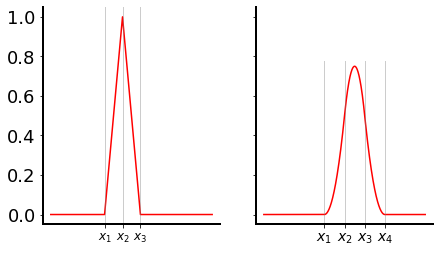

In [161]:
# Create two subplots 
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(7,4))
# Customized the left plot
ax1.plot(x, Blin.basis[:,6], color="red", label=r"Spline")
ax1.spines["right"].set_visible(False)
ax1.spines["top"].set_visible(False)
ax1.axvline(Blin.knots[6], 0, Blin.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax1.axvline(Blin.knots[7], 0, Blin.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax1.axvline(Blin.knots[8], 0, Blin.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax1.set_xticks([Blin.knots[6], Blin.knots[7], Blin.knots[8]])
ax1.set_xticklabels([r"$x_1$", r"$x_2$", r"$x_3$"], size=12)

# Customize the right plot
ax2.plot(x, Bquad.basis[:,6], color="red", label=r"Spline")
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
ax2.axvline(Bquad.knots[6], 0, Bquad.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax2.axvline(Bquad.knots[7], 0, Bquad.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax2.axvline(Bquad.knots[8], 0, Bquad.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax2.axvline(Bquad.knots[9], 0, Bquad.basis.max(), color="grey", alpha=0.4, linewidth=1)
ax2.set_xticks([Bquad.knots[6],Bquad.knots[7],Bquad.knots[8], Bquad.knots[9]])
ax2.set_xticklabels([r"$x_1$", r"$x_2$", r"$x_3$", r"$x_4$"], size=14)

#plt.savefig('..\\..\\Thesis\\thesisplots\\linear_and_quadratic_spline.pdf', transparent=False, bbox_inches='tight')

In [1]:
from stareg.utils import check_constraint_full_model, check_constraint
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.io as pioz
from plotly.subplots import make_subplots
from stareg.star_model import StarModel

## **INCREASING EXAMPLE**


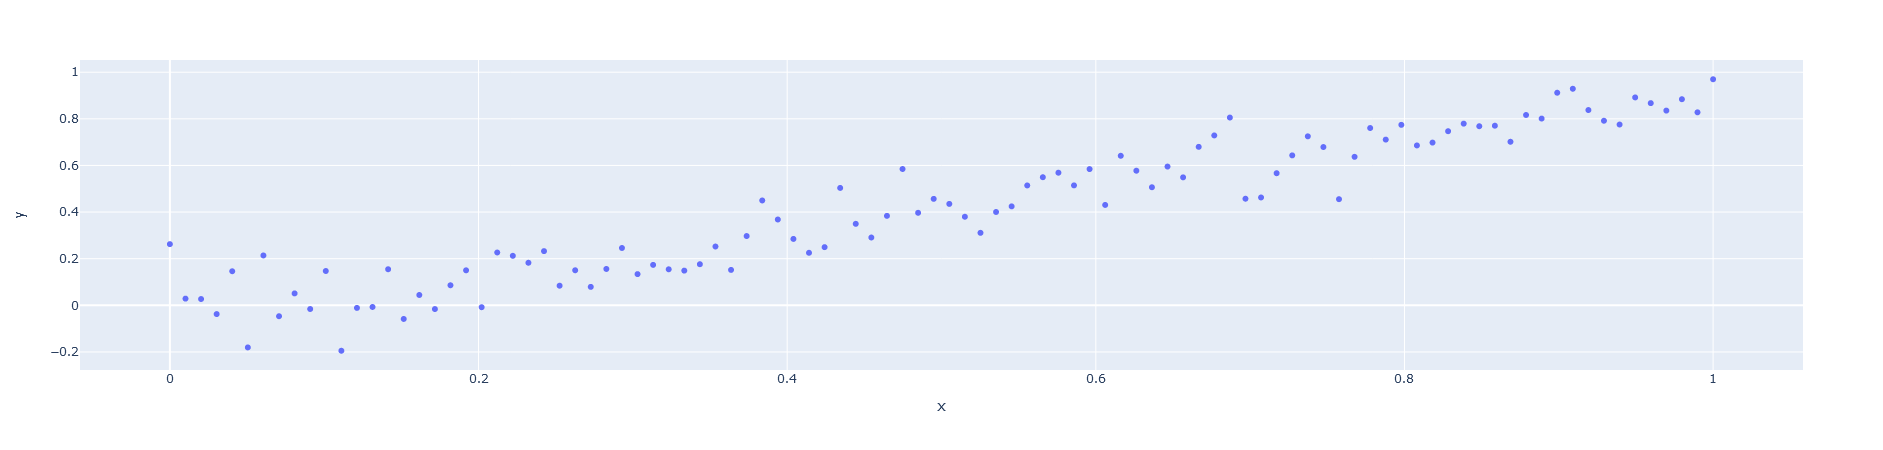

In [81]:
np.random.seed(1)
x = np.linspace(0,1,100)
xtest = np.linspace(0,1,1000)
y =  np.abs(x-0.1) + np.random.normal(scale=0.1, size=len(x))
px.scatter(x=x, y=y)

In [80]:
m = (("s(1)", "inc", 20, (0.01, 0), "equidistant"),)
M = StarModel(description=m).fit(X=x.reshape(-1,1), y=y, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [26]:
minc = (("s(1)", "inc", 20, (0.01, 6000), "equidistant"),)
Minc = StarModel(description=minc).fit(X=x.reshape(-1,1), y=y, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [32]:
ypred = M.predict(X=xtest.reshape(-1,1))
ypredinc = Minc.predict(X=xtest.reshape(-1,1))

cc = np.diff(ypred, 1) < 0
cc_constr = np.diff(ypredinc, 1) < -0.000001
print("Percentage of predictions that violate the constraint for unconstraint fit: \t", round(sum(cc) / len(cc), 3))
print("Percentage of predictions that violate the constraint for constraint fit: \t", round(sum(cc_constr) / len(cc_constr), 3))

Percentage of predictions that violate the constraint for unconstraint fit: 	 0.225
Percentage of predictions that violate the constraint for constraint fit: 	 0.081


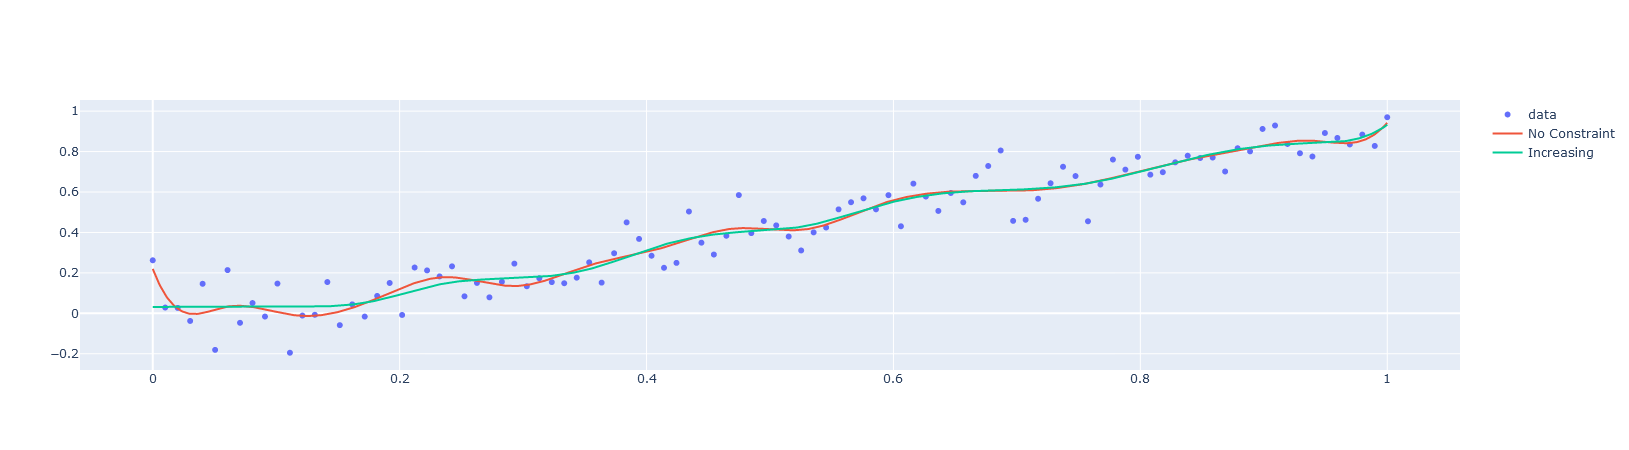

In [35]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode="markers", name="data"))
fig.add_trace(go.Scatter(x=xtest, y=ypred, mode="lines", name="No Constraint"))
fig.add_trace(go.Scatter(x=xtest, y=ypredinc, mode="lines", name="Increasing"))

## **DECREASING EXAMPLE**

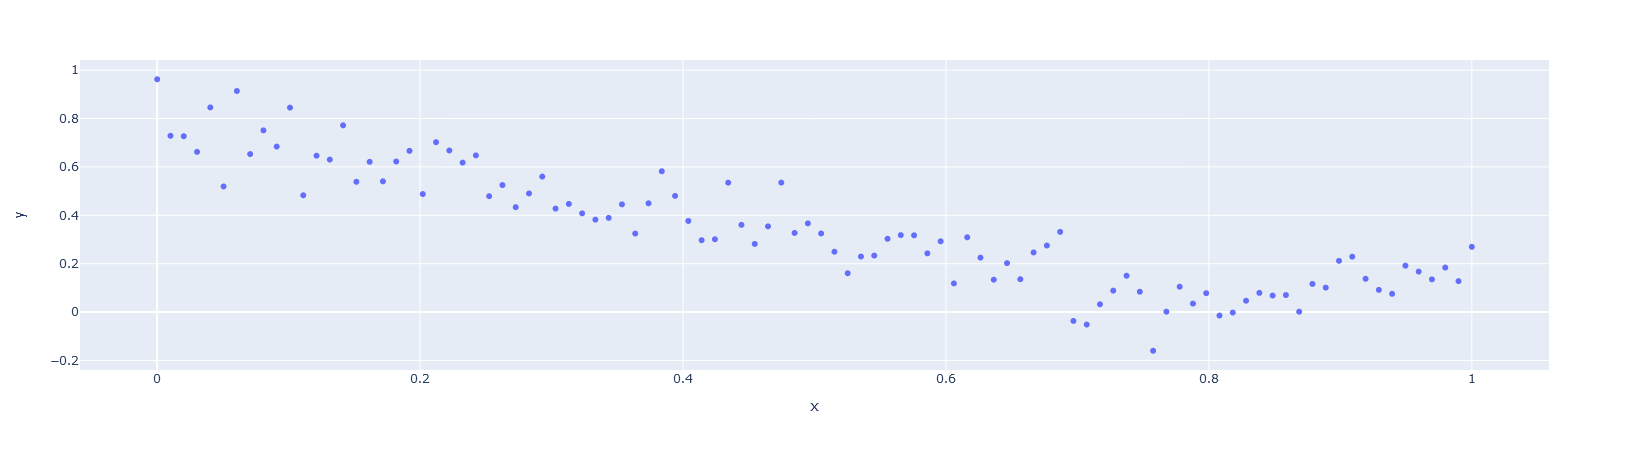

In [74]:
np.random.seed(1)
x = np.linspace(0,1,100)
xtest = np.linspace(0,1,1000)
y =  np.abs(x-0.8) + np.random.normal(scale=0.1, size=len(x))
px.scatter(x=x, y=y)

In [75]:
m = (("s(1)", "dec", 20, (0.01, 0), "equidistant"),)
M = StarModel(description=m).fit(X=x.reshape(-1,1), y=y, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [76]:
mdec = (("s(1)", "dec", 20, (0.01, 6000), "equidistant"),)
Mdec = StarModel(description=mdec).fit(X=x.reshape(-1,1), y=y, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [77]:
ypred = M.predict(X=xtest.reshape(-1,1))
ypreddec = Mdec.predict(X=xtest.reshape(-1,1))

cc = np.diff(ypred, 1) > 0.0001
cc_constr = np.diff(ypreddec, 1) > 0.0001
print("Percentage of predictions that violate the constraint for unconstraint fit: \t", round(sum(cc) / len(cc), 3))
print("Percentage of predictions that violate the constraint for constraint fit: \t", round(sum(cc_constr) / len(cc_constr), 3))

Percentage of predictions that violate the constraint for unconstraint fit: 	 0.318
Percentage of predictions that violate the constraint for constraint fit: 	 0.0


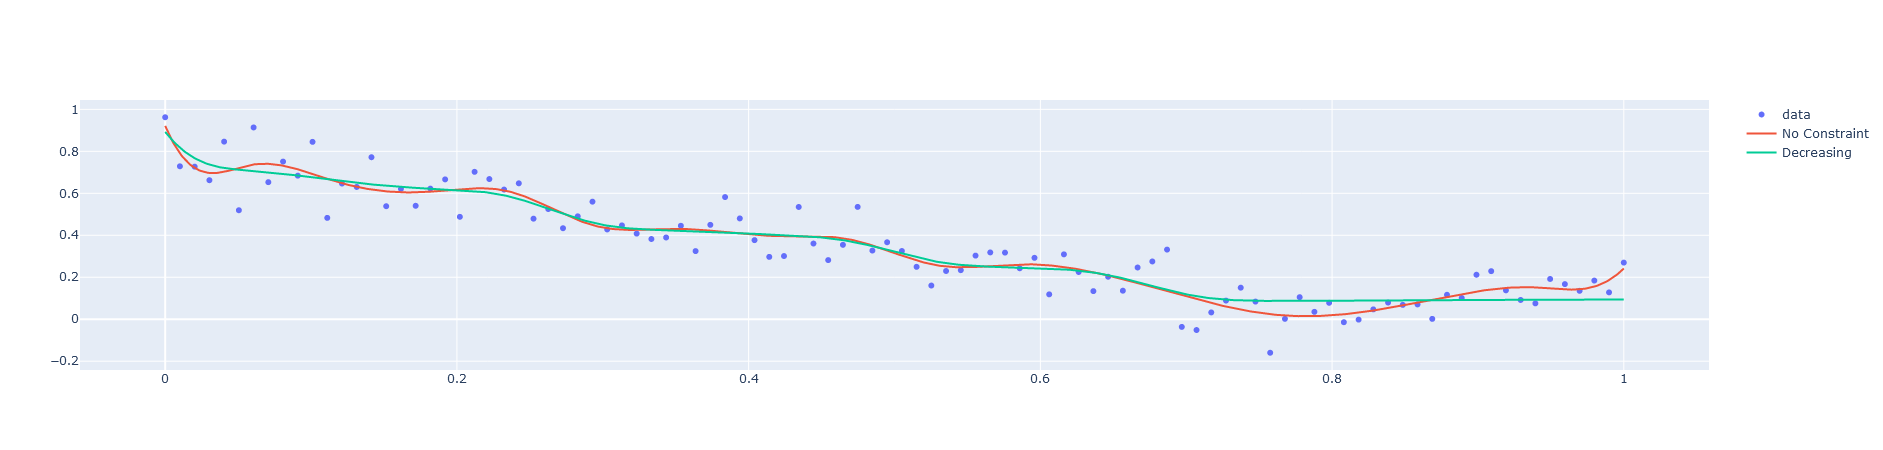

In [78]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=y, mode="markers", name="data"))
fig.add_trace(go.Scatter(x=xtest, y=ypred, mode="lines", name="No Constraint"))
fig.add_trace(go.Scatter(x=xtest, y=ypreddec, mode="lines", name="Decreasing"))

## **CONCAVE EXAMPLE**

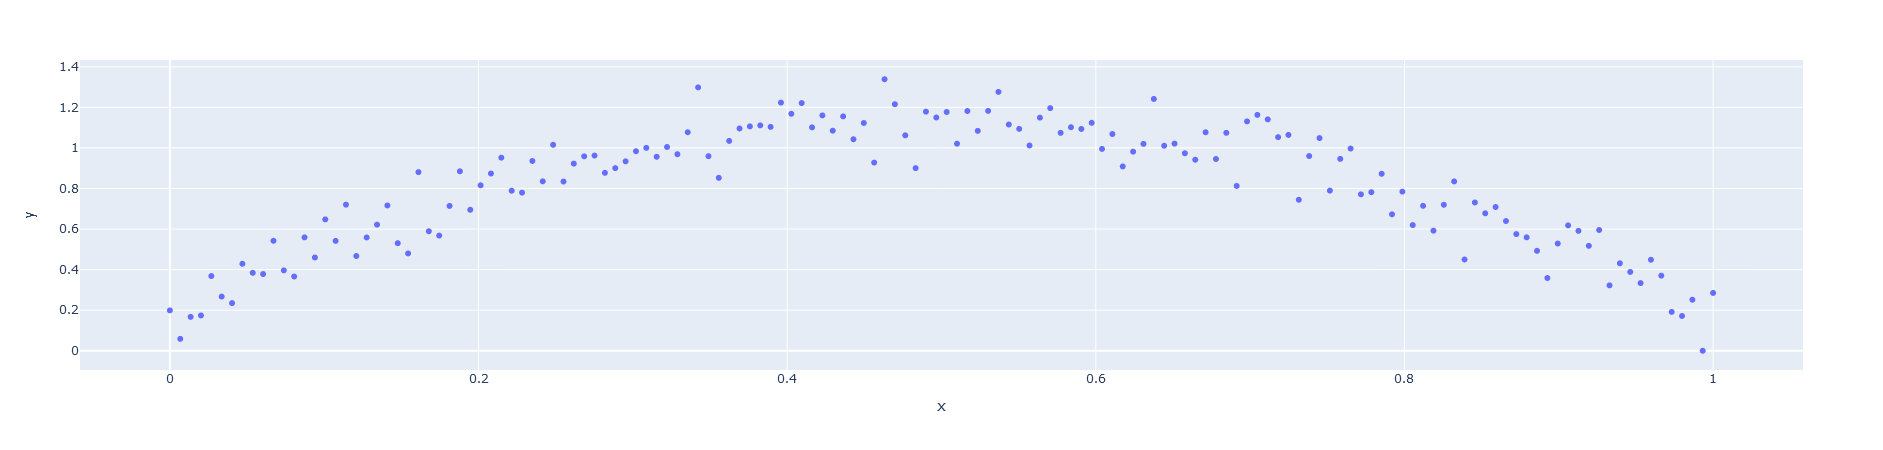

In [68]:
xx = np.linspace(-1,1,150)
yc = xx**2 + np.random.normal(scale=0.1, size=len(xx))
yconcave = -1*yc + abs(min(-1*yc))
x = (xx - xx.min()) / (xx.max() - xx.min())
xtest = np.linspace(0,1,1000)
px.scatter(x=x, y=yconcave)

In [69]:
m = (("s(1)", "conc", 20, (0.01, 0), "equidistant"),)
M = StarModel(description=m).fit(X=x.reshape(-1,1), y=yconcave, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [70]:
mconc = (("s(1)", "conc", 20, (0.01, 60000), "equidistant"),)
Mconc = StarModel(description=mconc).fit(X=x.reshape(-1,1), y=yconcave, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [71]:
ypred = M.predict(X=xtest.reshape(-1,1))
ypredconc = Mconc.predict(X=xtest.reshape(-1,1))

cc = np.diff(ypred, 2) > 0.00000001
cc_constr = np.diff(ypredconc, 2) > 0.00000001
print("Percentage of predictions that violate the constraint for unconstraint fit: \t", round(sum(cc) / len(cc), 3))
print("Percentage of predictions that violate the constraint for constraint fit: \t", round(sum(cc_constr) / len(cc_constr), 3))

Percentage of predictions that violate the constraint for unconstraint fit: 	 0.507
Percentage of predictions that violate the constraint for constraint fit: 	 0.116


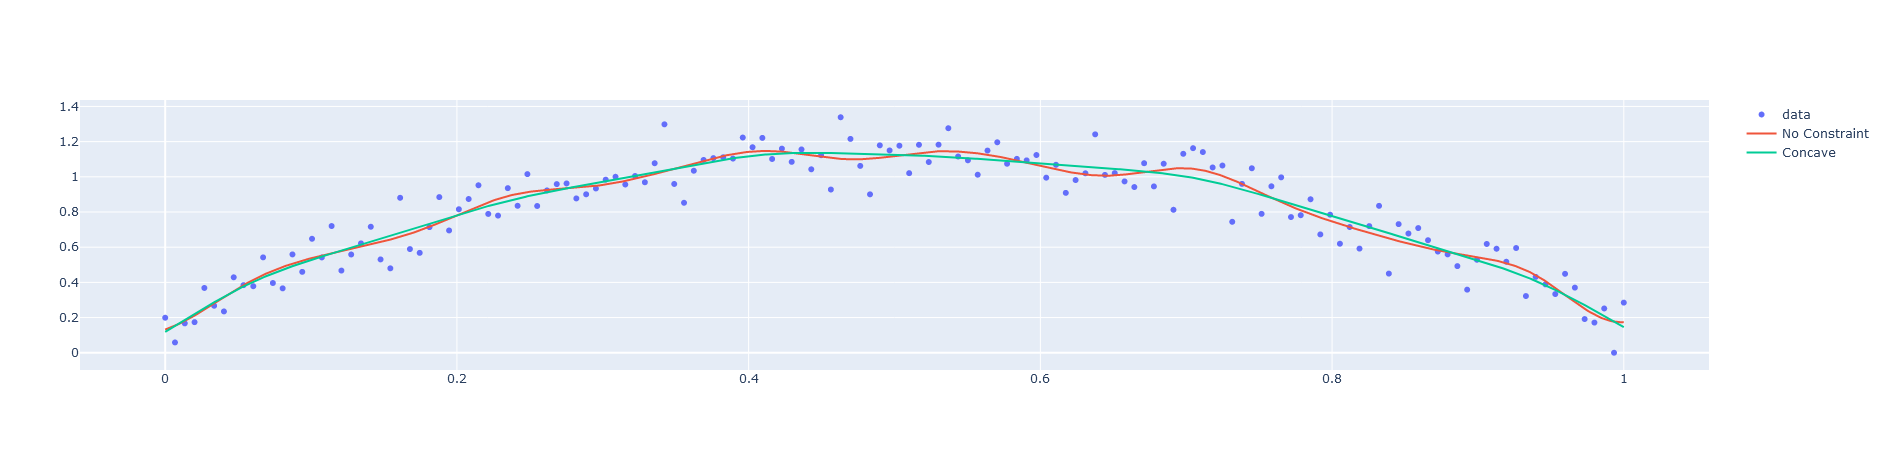

In [72]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=yconcave, mode="markers", name="data"))
fig.add_trace(go.Scatter(x=xtest, y=ypred, mode="lines", name="No Constraint"))
fig.add_trace(go.Scatter(x=xtest, y=ypredconc, mode="lines", name="Concave"))

## **CONVEX EXAMPLE**

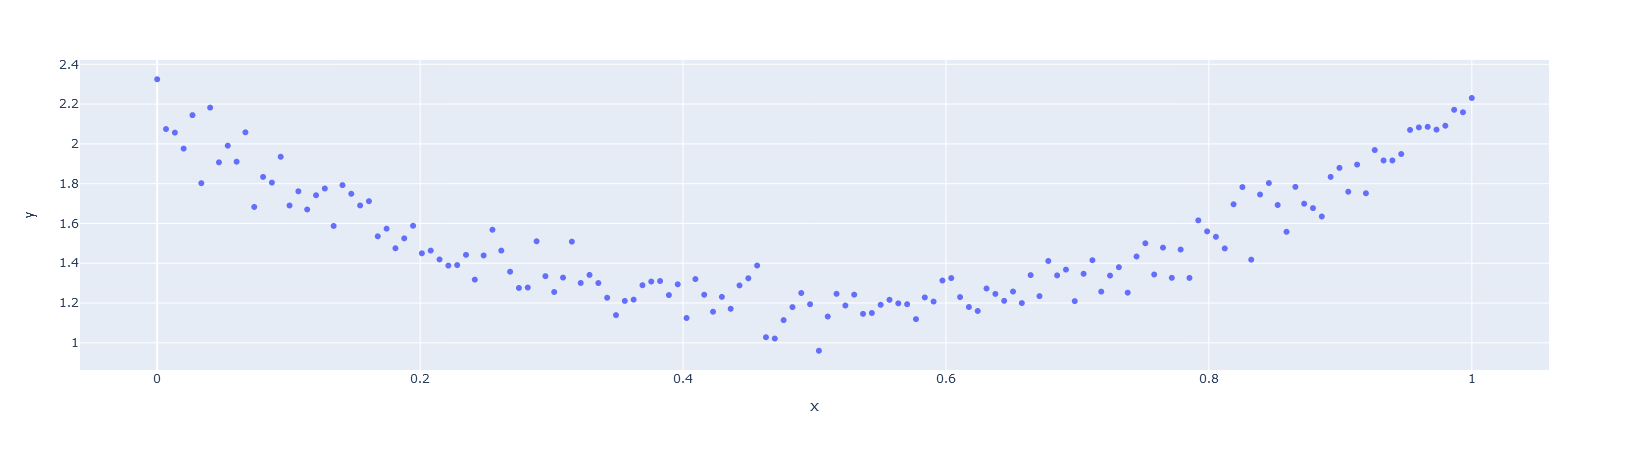

In [47]:
np.random.seed(1)
xx = np.linspace(-1,1,150)
yc = xx**2 + np.random.normal(scale=0.1, size=len(xx))
yconvex = yc + abs(min(-1*yc))
x = (xx - xx.min()) / (xx.max() - xx.min())
xtest = np.linspace(0,1,1000)
px.scatter(x=x, y=yconvex)

In [50]:
m = (("s(1)", "conv", 20, (0.01, 0), "equidistant"),)
M = StarModel(description=m).fit(X=x.reshape(-1,1), y=yconvex, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [49]:
mconv = (("s(1)", "conv", 20, (0.01, 60000), "equidistant"),)
Mconv = StarModel(description=mconv).fit(X=x.reshape(-1,1), y=yconvex, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [51]:
ypred = M.predict(X=xtest.reshape(-1,1))
ypredconv = Mconv.predict(X=xtest.reshape(-1,1))

cc = np.diff(ypred, 2) > 0.00000001
cc_constr = np.diff(ypredconc, 2) > 0.00000001
print("Percentage of predictions that violate the constraint for unconstraint fit: \t", round(sum(cc) / len(cc), 3))
print("Percentage of predictions that violate the constraint for constraint fit: \t", round(sum(cc_constr) / len(cc_constr), 3))

Percentage of predictions that violate the constraint for unconstraint fit: 	 0.579
Percentage of predictions that violate the constraint for constraint fit: 	 0.116


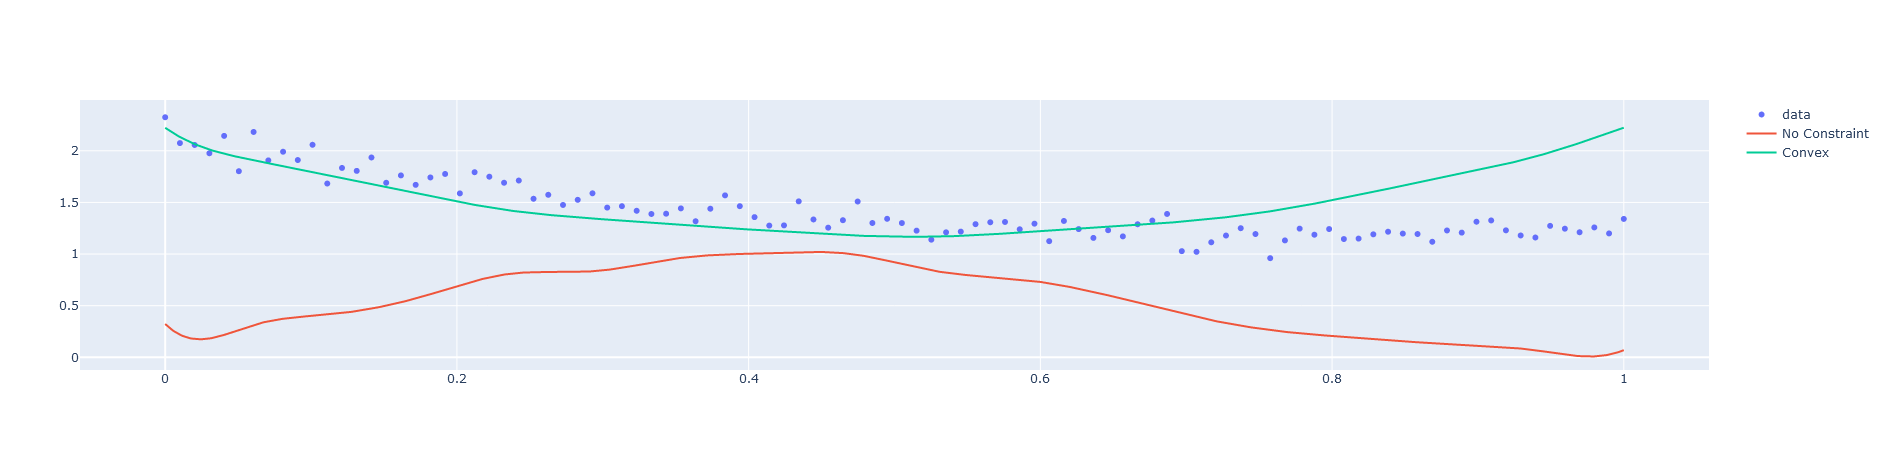

In [64]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=yconvex, mode="markers", name="data"))
fig.add_trace(go.Scatter(x=xtest, y=ypred, mode="lines", name="No Constraint"))
fig.add_trace(go.Scatter(x=xtest, y=ypredconv, mode="lines", name="Convex"))

## **PEAK EXAMPLE**

In [53]:
from stareg.utils import check_constraint_full_model, check_constraint
import plotly.graph_objects as go
import numpy as np
import pandas as pd
import os
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from stareg.star_model import StarModel

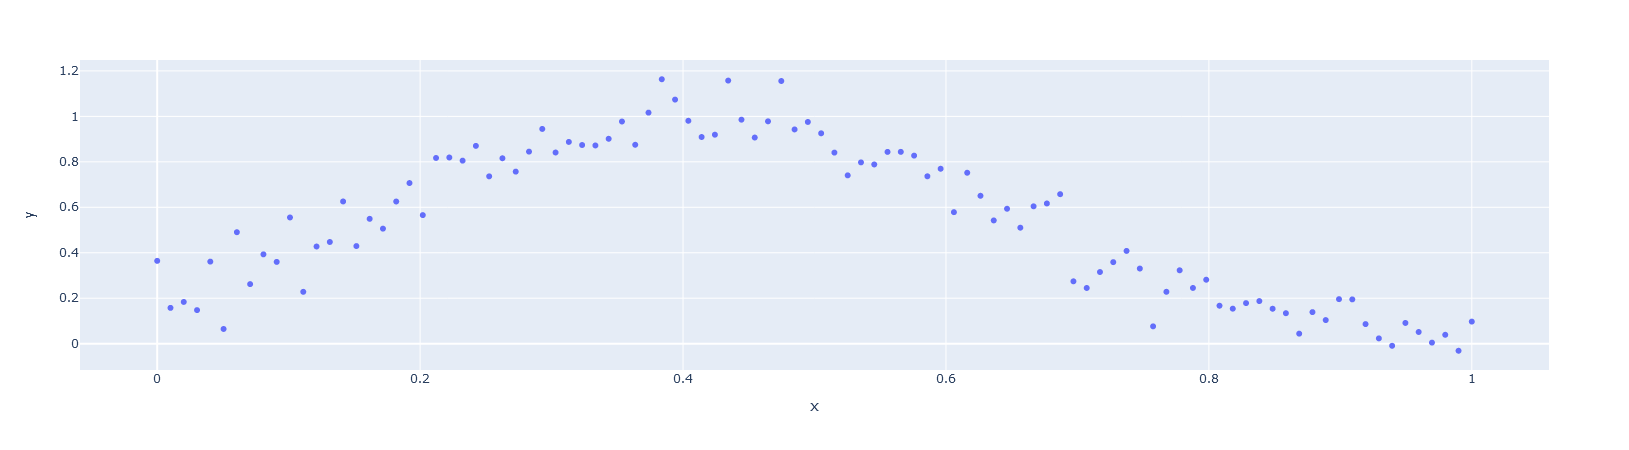

In [54]:
np.random.seed(1)
x = np.linspace(0,1,100)
ypeak = np.exp(-(x-0.4)**2/0.1) + np.random.normal(scale=0.1, size=len(x)) #+ 0.5*x**1.2
xtest = np.linspace(0,1,1000)
px.scatter(x=x, y=ypeak)

In [63]:
m = (("s(1)", "peak", 20, (0.01, 0), "equidistant"),)
M = StarModel(description=m).fit(X=x.reshape(-1,1), y=ypeak, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [62]:
mpeak = (("s(1)", "peak", 20, (0.01, 6000), "equidistant"),)
Mpeak = StarModel(description=mpeak).fit(X=x.reshape(-1,1), y=ypeak, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [61]:
mpeakconc = (("s(1)", "conc", 20, (0.01, 6000), "equidistant"),)
Mpeakconc = StarModel(description=mpeakconc).fit(X=x.reshape(-1,1), y=ypeak, plot_=0)

Enforce global positivity: (y, n) 
 Caution: Only use with non-standardized data! 
 


----Start PIRLS-----
--PIRLS converged!--


In [58]:
from stareg.utils import check_constraint_peak

ypred = M.predict(X=xtest.reshape(-1,1))
ypredpeak = Mpeak.predict(X=xtest.reshape(-1,1))
ypredpeakconc = Mpeakconc.predict(X=xtest.reshape(-1,1))

cc = check_constraint_peak(ypred)
cc_constr = check_constraint_peak(ypredpeak)
cc_constr_ = check_constraint_peak(ypredpeakconc)

print("Percentage of predictions that violate the constraint for unconstraint fit: \t", round(sum(cc) / len(cc), 3))
print("Percentage of predictions that violate the constraint for constraint fit using peak constraint: \t", round(sum(cc_constr) / len(cc_constr), 9))
print("Percentage of predictions that violate the constraint for constraint fit using concav constraint: \t", round(sum(cc_constr_) / len(cc_constr_), 3))

Percentage of predictions that violate the constraint for unconstraint fit: 	 0.061
Percentage of predictions that violate the constraint for constraint fit using peak constraint: 	 0.0
Percentage of predictions that violate the constraint for constraint fit using concav constraint: 	 0.056


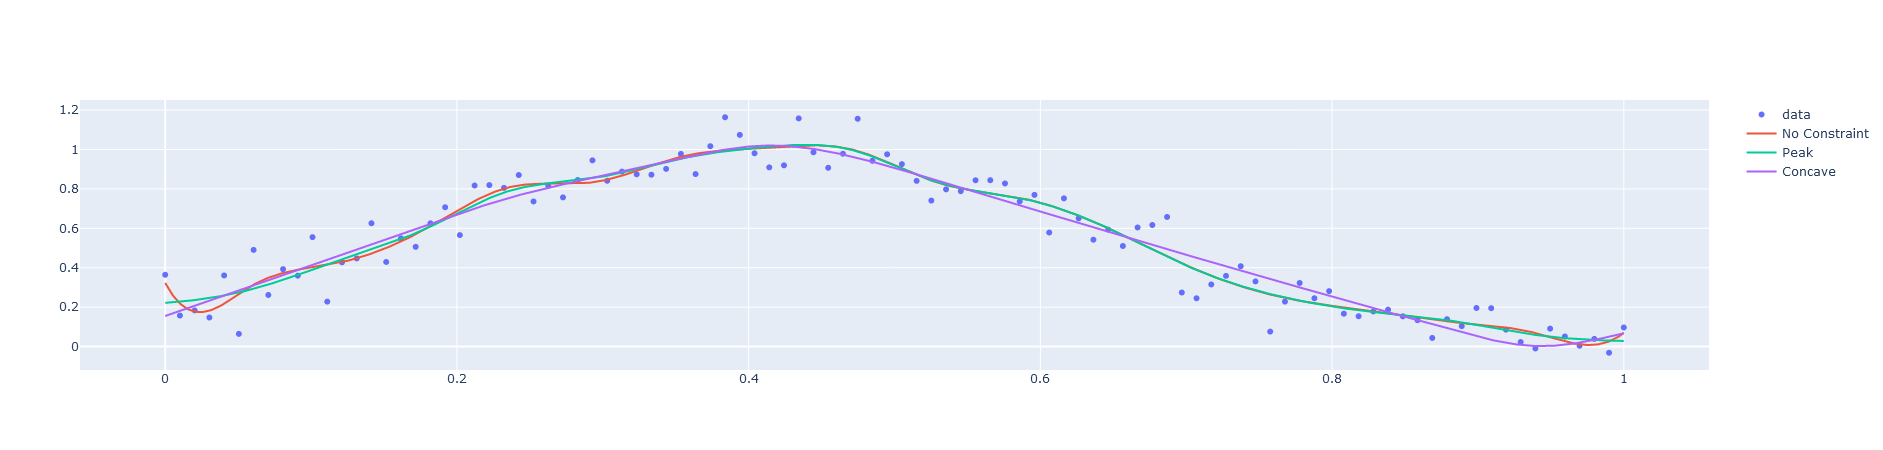

In [60]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=x, y=ypeak, mode="markers", name="data"))
fig.add_trace(go.Scatter(x=xtest, y=ypred, mode="lines", name="No Constraint"))
fig.add_trace(go.Scatter(x=xtest, y=ypredpeak, mode="lines", name="Peak"))
fig.add_trace(go.Scatter(x=xtest, y=ypredpeakconc, mode="lines", name="Concave"))